
Epoch 1 (SGD):
 Updated weights: [0.26675841 0.70953356], Updated bias: -2.3176764649665826

Epoch 2 (SGD):
 Updated weights: [0.25681836 0.65983331], Updated bias: -2.337556567275694

Epoch 3 (SGD):
 Updated weights: [0.24863594 0.61892123], Updated bias: -2.3539213992708143

Epoch 4 (SGD):
 Updated weights: [0.24184854 0.58498421], Updated bias: -2.3674962072343506

Epoch 5 (SGD):
 Updated weights: [0.23617681 0.55662559], Updated bias: -2.378839653053385

Epoch 6 (SGD):
 Updated weights: [0.23140564 0.53276973], Updated bias: -2.388381997427994

Epoch 7 (SGD):
 Updated weights: [0.22736825 0.51258276], Updated bias: -2.39645678666931

Epoch 8 (SGD):
 Updated weights: [0.22393411 0.49541206], Updated bias: -2.403325067154749

Epoch 9 (SGD):
 Updated weights: [0.22099998 0.48074145], Updated bias: -2.409193311373907

Epoch 10 (SGD):
 Updated weights: [0.21848336 0.46815832], Updated bias: -2.4142265621250325

Epoch 1 (Batch GD):
 Updated weights: [ 0.3822254  -1.21249817], Updated bi

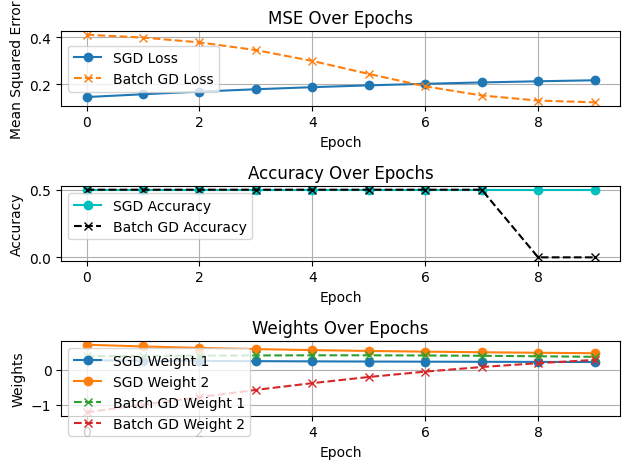


Final Results:
SGD: Final weights: [0.21848336 0.46815832], Final bias: -2.4142265621250325
Batch GD: Final weights: [0.36525972 0.27767341], Final bias: -0.5321388115396122


In [ ]:
#EXP2 - PERCEPTRON,SIGMOID,SGD,BGD, ACCURACY AND WT PLOT

import numpy as np
import matplotlib.pyplot as plt

def perceptron(x, w, b):
    return np.dot(x, w) + b

def sigmoid(y_in):
    return 1 / (1 + np.exp(-y_in))

def update_weights(c, y, y_hat, x):
    return c * (y_hat - y) * x

def update_bias(c, y, y_hat):
    return c * (y_hat - y)

def compute_loss(y, y_hat):
    return np.mean((y - y_hat) ** 2)

def compute_accuracy(y, y_hat, threshold=0.2):
    predictions = (abs(y - y_hat) < threshold).astype(int)
    return np.mean(predictions)

def sgd(x, y, epochs, alpha):
    w, b = np.random.randn(x.shape[1]), np.random.randn()
    weights, biases, losses, accuracies = [], [], [], []

    for epoch in range(epochs):
        print(f"\nEpoch {epoch + 1} (SGD):")
        for xi, yi in zip(x, y):
            y_hat = sigmoid(perceptron(xi, w, b))
            dw = update_weights(1, yi, y_hat, xi)
            db = update_bias(1, yi, y_hat)
            w -= alpha * dw
            b -= alpha * db
            print(f" Updated weights: {w}, Updated bias: {b}")

        y_hat_total = sigmoid(perceptron(x, w, b))
        weights.append(w.copy()), biases.append(b)
        losses.append(compute_loss(y, y_hat_total))
        accuracies.append(compute_accuracy(y, y_hat_total))

    return np.array(weights), np.array(biases), np.array(losses), np.array(accuracies)

def batch_gd(x, y, epochs, alpha):
    w, b = np.random.randn(x.shape[1]), np.random.randn()
    weights, biases, losses, accuracies = [], [], [], []

    for epoch in range(epochs):
        print(f"\nEpoch {epoch + 1} (Batch GD):")
        y_hat = sigmoid(perceptron(x, w, b))
        dw = np.mean(update_weights(1, y, y_hat, x), axis=0)
        db = np.mean(update_bias(1, y, y_hat))
        w -= alpha * dw
        b -= alpha * db
        print(f" Updated weights: {w}, Updated bias: {b}")

        weights.append(w.copy()), biases.append(b)
        losses.append(compute_loss(y, y_hat))
        accuracies.append(compute_accuracy(y, y_hat))

    return np.array(weights), np.array(biases), np.array(losses), np.array(accuracies)

x = np.array([[0.5, 2.5]])
y = np.array([0.2, 0.9])
epochs, alpha = 10, 0.1

weights_sgd, biases_sgd, losses_sgd, accuracies_sgd = sgd(x, y, epochs, alpha)
weights_batch, biases_batch, losses_batch, accuracies_batch = batch_gd(x, y, epochs, alpha)

plt.subplot(3, 1, 1)
plt.plot(losses_sgd, marker='o', label='SGD Loss')
plt.plot(losses_batch, marker='x', linestyle='--', label='Batch GD Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('MSE Over Epochs')
plt.legend()
plt.grid(True)

# Accuracy plot
plt.subplot(3, 1, 2)
plt.plot(accuracies_sgd, marker='o', color='c', label='SGD Accuracy')
plt.plot(accuracies_batch, marker='x', linestyle='--', color='k', label='Batch GD Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.grid(True)

# Weight plot
plt.subplot(3, 1, 3)
for i in range(weights_sgd.shape[1]):
    plt.plot(weights_sgd[:, i], marker='o', label=f'SGD Weight {i+1}')
for i in range(weights_batch.shape[1]):
    plt.plot(weights_batch[:, i], marker='x', linestyle='--', label=f'Batch GD Weight {i+1}')
plt.xlabel('Epoch')
plt.ylabel('Weights')
plt.title('Weights Over Epochs')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nFinal Results:")
print(f"SGD: Final weights: {weights_sgd[-1]}, Final bias: {biases_sgd[-1]}")
print(f"Batch GD: Final weights: {weights_batch[-1]}, Final bias: {biases_batch[-1]}")
